# Basic Implementation of H2O Gradient Boosting for Classification on Titatnic DataSet

## The First Part is Data Preprocessing & Feature Engineering and the Second Part is H2O-GBM implementation

## Important Note:  You can leave the first part because the objective of this Notebook is to learn some implementation basics of H20.

# Part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pandasql import sqldf

ModuleNotFoundError: No module named 'pandasql'

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
data_train_all = pd.read_csv("train.csv")
data_test_all=pd.read_csv("test.csv")

In [6]:
data_test_all_pred=pd.read_csv("test.csv")      ## This dataframe will be used in the last . This Dataframe doesn't have much significance

In [7]:
data_train_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
data_train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
data_test_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Data Pre-Processing

##### Column: Name : Feature Engineer Column 'Name'

In [10]:
import re

In [11]:
data_train_all['Title']= data_train_all.Name.apply(lambda a:re.search(' ([A-Z][a-z]+)\.',a).group(1))

In [12]:
data_test_all['Title'] = data_test_all.Name.apply(lambda a:re.search(' ([A-Z][a-z]+)\.',a).group(1))

In [13]:
data_train_all['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [14]:
data_train_all.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Jonkheer      1
Mme           1
Don           1
Capt          1
Lady          1
Sir           1
Countess      1
Ms            1
Name: Title, dtype: int64

In [15]:
data_test_all.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [16]:
data_train_all['Title'] = data_train_all['Title'].replace(['Mlle','Ms'],'Miss')  
data_train_all['Title'] = data_train_all['Title'].replace('Mme','Mrs')
data_train_all['Title'] = data_train_all['Title'].replace(['Capt','Col','Major'],'Army')
data_train_all['Title'] = data_train_all['Title'].replace(['Countess','Don','Dona','Jonkheer','Lady','Sir'],'Noble')

In [17]:
data_test_all['Title'] = data_test_all['Title'].replace(['Mlle','Ms'],'Miss')  
data_test_all['Title'] = data_test_all['Title'].replace('Mme','Mrs')
data_test_all['Title'] = data_test_all['Title'].replace(['Capt','Col','Major'],'Army')
data_test_all['Title'] = data_test_all['Title'].replace(['Countess','Don','Dona','Jonkheer','Lady','Sir'],'Noble')

In [18]:
data_train_all['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Dr          7
Rev         6
Army        5
Noble       5
Name: Title, dtype: int64

In [20]:
data_test_all['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Rev         2
Army        2
Noble       1
Dr          1
Name: Title, dtype: int64

In [23]:
data_train_all=data_train_all.drop('Ticket',axis=1)  ## we could have also used (inplace= True) and then we need not do data_train _all= data_train_all.drop(xxxxxx)

In [24]:
data_test_all=data_test_all.drop('Ticket',axis=1)

#### Column: Cabin: The Nan values in the Cabin column means that the passangers didnt had the cabin.

In [25]:
f= lambda x: str(x)[0]

In [26]:
data_train_all.Cabin=data_train_all.Cabin.apply(f)

In [27]:
data_train_all['Cabin']=data_train_all['Cabin'].replace(['T'],'n')

In [28]:
data_test_all.Cabin=data_test_all.Cabin.apply(f)

In [29]:
data_train_all.Cabin.value_counts()

n    688
C     59
B     47
D     33
E     32
A     15
F     13
G      4
Name: Cabin, dtype: int64

In [30]:
data_test_all.Cabin.value_counts()

n    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

In [31]:
data_train_all.groupby(['Cabin'])['Survived'].sum()

Cabin
A      7
B     35
C     35
D     25
E     24
F      8
G      2
n    206
Name: Survived, dtype: int64

##### Column: Age: Missing Value Treatment

In [32]:
data_train_all.groupby(['Sex'])['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [33]:
data_train_all.Age.median()

28.0

In [34]:
data_train_all.groupby(['Pclass']).Age.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [35]:
## we will be replaceing Age by median value

In [36]:
data_train_all.Age=data_train_all.Age.fillna(data_train_all.Age.median())

In [37]:
data_test_all.Age=data_test_all.Age.fillna(data_train_all.Age.median())

#### Discretization of the Numeric columns : Age 

In [38]:
# Binning by quantile
#data_train_all.Age=pd.qcut(data_train_all.Age, q=4, labels=False)

In [39]:
# Binning by fixed Interval

In [40]:
data_train_all.Age=pd.cut(data_train_all.Age, bins=[0,20,40,60,80,100],right=True, labels=False, retbins=0, include_lowest=1)

In [41]:
data_test_all.Age=pd.cut(data_test_all.Age, bins=[0,20,40,60,80,100],right=True, labels=False, retbins=0, include_lowest=1)

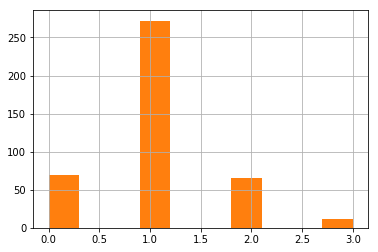

In [43]:
data_test_all.Age.hist()
plt.show()

#### Discretization of the Numeric columns : Fare

In [44]:
data_train_all.Fare.min()

0.0

In [45]:
data_train_all.Fare=pd.cut(data_train_all.Fare, bins=[0,10,20,30,40,50,100,600],right=True, labels=False, retbins=0, include_lowest=1)

In [46]:
data_train_all.Fare.value_counts()

0    336
1    179
2    142
5    107
3     58
6     53
4     16
Name: Fare, dtype: int64

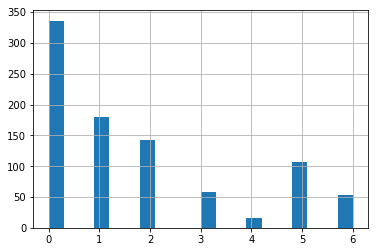

In [47]:
data_train_all.Fare.hist(bins=20)
plt.show()

In [48]:
data_test_all.Fare=pd.cut(data_test_all.Fare, bins=[0,10,20,30,40,50,100,600],right=True, labels=False, retbins=0, include_lowest=1)

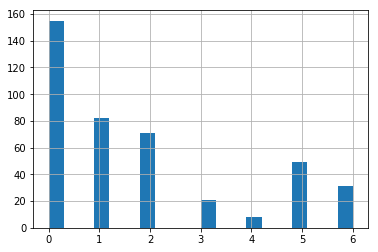

In [49]:
data_test_all.Fare.hist(bins=20)
plt.show()

In [50]:
data_train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null int64
Cabin          891 non-null object
Embarked       889 non-null object
Title          891 non-null object
dtypes: int64(7), object(5)
memory usage: 83.6+ KB


In [51]:
data_test_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
Title          418 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 36.0+ KB


In [45]:
### Missing Value Treatment of Column Fare in Test Set

In [52]:
data_test_all.Fare.fillna(0,inplace=True)

In [53]:
data_test_all.Fare.value_counts()

0.0    156
1.0     82
2.0     71
5.0     49
6.0     31
3.0     21
4.0      8
Name: Fare, dtype: int64

### Missing Value Treatment of the Column Embark in the Training Set.

In [60]:
data_train_all.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [61]:
data_train_all.Embarked.fillna('S', inplace=True)

In [62]:
data_train_all.drop(['Name','PassengerId'],inplace=True,axis=1)

ValueError: labels ['Name' 'PassengerId'] not contained in axis

In [63]:
data_train_all.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,1,1,0,0,n,S,Mr
1,1,1,female,1,1,0,5,C,C,Mrs
2,1,3,female,1,0,0,0,n,S,Miss
3,1,1,female,1,1,0,5,C,S,Mrs
4,0,3,male,1,0,0,0,n,S,Mr


In [64]:
data_test_all.drop(['Name','PassengerId'],inplace=True,axis=1)

In [65]:
data_test_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null int64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Cabin       418 non-null object
Embarked    418 non-null object
Title       418 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 29.5+ KB


In [66]:
type(data_train_all.Title[2])

str

In [ ]:
## Create the dummy variables

In [67]:
data_train_all=pd.get_dummies(data_train_all,drop_first=False)  ## In case of categorical variable you dont need to drop one dummy variable.

In [68]:
data_test_all=pd.get_dummies(data_test_all,drop_first=False) 

In [69]:
data_train_all.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Embarked_Q,Embarked_S,Title_Army,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Rev
0,0,3,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,1,1,0,5,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,3,1,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,1,1,1,0,5,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,0,3,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [70]:
data_test_all.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,...,Embarked_Q,Embarked_S,Title_Army,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Noble,Title_Rev
0,3,1,0,0,0.0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,3,2,1,0,0.0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,2,3,0,0,0.0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,3,1,0,0,0.0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,3,1,1,1,1.0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [71]:
data_train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 27 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Age             891 non-null int64
SibSp           891 non-null int64
Parch           891 non-null int64
Fare            891 non-null int64
Sex_female      891 non-null uint8
Sex_male        891 non-null uint8
Cabin_A         891 non-null uint8
Cabin_B         891 non-null uint8
Cabin_C         891 non-null uint8
Cabin_D         891 non-null uint8
Cabin_E         891 non-null uint8
Cabin_F         891 non-null uint8
Cabin_G         891 non-null uint8
Cabin_n         891 non-null uint8
Embarked_C      891 non-null uint8
Embarked_Q      891 non-null uint8
Embarked_S      891 non-null uint8
Title_Army      891 non-null uint8
Title_Dr        891 non-null uint8
Title_Master    891 non-null uint8
Title_Miss      891 non-null uint8
Title_Mr        891 non-null uint8
Title_Mrs       891 non-null uint8
Title_Noble     891 

In [ ]:
## Column Family

In [72]:
data_train_all['Family']=data_train_all['SibSp']+data_train_all['Parch']

In [73]:
data_test_all['Family']=data_test_all['SibSp']+data_test_all['Parch']

In [74]:
data_train_all.drop(['SibSp','Parch'],inplace=True,axis=1)
data_test_all.drop(['SibSp','Parch'],inplace=True,axis=1)

In [75]:
data_test_all.Family.value_counts()

0     253
1      74
2      57
3      14
4       7
10      4
6       4
5       3
7       2
Name: Family, dtype: int64

In [76]:
data_test_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 25 columns):
Pclass          418 non-null int64
Age             418 non-null int64
Fare            418 non-null float64
Sex_female      418 non-null uint8
Sex_male        418 non-null uint8
Cabin_A         418 non-null uint8
Cabin_B         418 non-null uint8
Cabin_C         418 non-null uint8
Cabin_D         418 non-null uint8
Cabin_E         418 non-null uint8
Cabin_F         418 non-null uint8
Cabin_G         418 non-null uint8
Cabin_n         418 non-null uint8
Embarked_C      418 non-null uint8
Embarked_Q      418 non-null uint8
Embarked_S      418 non-null uint8
Title_Army      418 non-null uint8
Title_Dr        418 non-null uint8
Title_Master    418 non-null uint8
Title_Miss      418 non-null uint8
Title_Mr        418 non-null uint8
Title_Mrs       418 non-null uint8
Title_Noble     418 non-null uint8
Title_Rev       418 non-null uint8
Family          418 non-null int64
dtypes: float64(1)

In [77]:
data_train_all.Fare=data_train_all.Fare.astype(float)

In [78]:
data_train_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
Survived        891 non-null int64
Pclass          891 non-null int64
Age             891 non-null int64
Fare            891 non-null float64
Sex_female      891 non-null uint8
Sex_male        891 non-null uint8
Cabin_A         891 non-null uint8
Cabin_B         891 non-null uint8
Cabin_C         891 non-null uint8
Cabin_D         891 non-null uint8
Cabin_E         891 non-null uint8
Cabin_F         891 non-null uint8
Cabin_G         891 non-null uint8
Cabin_n         891 non-null uint8
Embarked_C      891 non-null uint8
Embarked_Q      891 non-null uint8
Embarked_S      891 non-null uint8
Title_Army      891 non-null uint8
Title_Dr        891 non-null uint8
Title_Master    891 non-null uint8
Title_Miss      891 non-null uint8
Title_Mr        891 non-null uint8
Title_Mrs       891 non-null uint8
Title_Noble     891 non-null uint8
Title_Rev       891 non-null uint8
Family          89

# Part 2
# Implementation of GBM in H2O.ai for predicting 

**Import H2O in python **

In [79]:
import h2o
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.171-b11, mixed mode)
  Starting server from C:\Users\Acer\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Acer\AppData\Local\Temp\tmpclmnkafe
  JVM stdout: C:\Users\Acer\AppData\Local\Temp\tmpclmnkafe\h2o_Acer_started_from_python.out
  JVM stderr: C:\Users\Acer\AppData\Local\Temp\tmpclmnkafe\h2o_Acer_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323... successful.


H2O cluster uptime:,14 secs
H2O cluster timezone:,Asia/Bangkok
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.1
H2O cluster version age:,11 days
H2O cluster name:,H2O_from_python_Acer_6d5oh5
H2O cluster total nodes:,1
H2O cluster free memory:,786 Mb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


**Convert Data from Pandas Data Frame to H2O data Frame**

In [80]:
data_train_h2o=h2o.H2OFrame(data_train_all)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [81]:
data_test_h2o=h2o.H2OFrame(data_test_all)

Parse progress: |█████████████████████████████████████████████████████████| 100%


**Check the type of the data after conversion **

In [82]:
type(data_test_h2o)

h2o.frame.H2OFrame

**NOTE : Always remember to convert the Target variable in training Data Set as Factor or categorical variable.
Else the the H2O's GBM algorithm will not create a classification algorithm. **

In [83]:
data_train_h2o['Survived']=data_train_h2o['Survived'].asfactor()    ## Converting Target Variable as Factor

**Import H2O's GBM **

In [84]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator  # import gbm estimator

**Instantiate the H2OGradientBoostingEstimator Class as model with some important parameters **

In [85]:
model = H2OGradientBoostingEstimator(## more trees is better if the learning rate is small enough 
  ## here, use "more than enough" trees - we have early stopping
  ntrees = 10000,                                                            

  ## smaller learning rate is better (this is a good value for most datasets, but see below for annealing)
  learn_rate = 0.01,                                                         

  ## early stopping once the validation AUC doesn't improve by at least 0.01% for 5 consecutive scoring events
  stopping_rounds = 5, stopping_tolerance = 1e-4, stopping_metric = "AUC", 

  ## sample 80% of rows per tree
  sample_rate = 0.8,                                                       

  ## sample 80% of columns per split
  col_sample_rate = 0.8,                                                   

  ## fix a random number generator seed for reproducibility
  seed = 1234,                                                             

  ## score every 10 trees to make early stopping reproducible (it depends on the scoring interval)
  score_tree_interval = 10, nfolds=5, max_depth=3)   ## Instantiating the class

**Train the model.**

Note1: We are using train not fit as in scikit learn

Note2: Since we are using N fold cross validation, and the size of data set being small; I am not spliting the the training set,
 instead, using the whole training set.
    
Note3: Will check the Bias and the Variance of the model from our N fold Cross Validation's mean and Std Dev of accuracy score.

In [86]:
model.train(x=data_train_h2o.names[1:],y=data_train_h2o.names[0], training_frame=data_train_h2o, model_id="GBM_Titanic",
            validation_frame=data_train_h2o)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [87]:
dir(model)

['F0point5',
 'F1',
 'F2',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_bc',
 '_bcin',
 '_check_targets',
 '_compute_algo',
 '_estimator_type',
 '_future',
 '_get_metrics',
 '_have_mojo',
 '_have_pojo',
 '_id',
 '_is_xvalidated',
 '_job',
 '_keyify_if_h2oframe',
 '_metrics_class',
 '_model_json',
 '_parms',
 '_plot',
 '_requires_training_frame',
 '_resolve_model',
 '_verify_training_frame_params',
 '_xval_keys',
 'accuracy',
 'actual_params',
 'aic',
 'algo',
 'auc',
 'balance_classes',
 'biases',
 'build_tree_one_node',
 'calibrate_model',
 'calibration_frame',
 'categorical_encoding',
 'catoffsets',
 'checkpoint',
 'class_sampling_factors',
 'coe

**5 fold Cross Validation Score**


Note: Important Metrics to be seen here are as follows:

     1. Accuracy Metric   : the mean accuracy of the model is 83.8% and the std dev is 2.3%
     2. auc Metric        : Mean AUC is 87% 
     
     
     From these metrics we can say that our model is fairly ok.
     We can further improve it by parameter tuning.

In [88]:
model.cross_validation_metrics_summary()

Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.8381619,0.0232680,0.8378378,0.7885714,0.8555555,0.8870056,0.8218391
auc,0.8700411,0.0140836,0.8921354,0.8446817,0.8569504,0.8947584,0.8616796
err,0.1618381,0.0232680,0.1621622,0.2114286,0.1444445,0.1129943,0.1781609
err_count,28.8,3.9849718,30.0,37.0,26.0,20.0,31.0
f0point5,0.7930275,0.0335072,0.7775119,0.7402598,0.8012820,0.8793104,0.7667732
f1,0.7906178,0.0224265,0.8125,0.7549669,0.7936508,0.8360656,0.7559055
f2,0.7898871,0.0247799,0.8507853,0.7702703,0.7861635,0.796875,0.7453416
lift_top_group,2.1342483,0.7578353,2.5,0.0,2.8125,2.6818182,2.676923
logloss,0.4416493,0.0123475,0.4347701,0.4613028,0.4359076,0.4154028,0.4608632
max_per_class_error,0.2231857,0.0163681,0.1891892,0.2191781,0.21875,0.2272727,0.2615385


**Check Model Parameters**

In [89]:
model.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'GBM_Titanic',
   'type': 'Key<Model>',
   'URL': '/3/Models/GBM_Titanic'}},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_1_sid_9515',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_1_sid_9515'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'py_1_sid_9515',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/py_1_sid_9515'}},
 'nfolds': {'default': 0, 'actual': 5},
 'keep_cross_validation_models': {'default': False, 'actual': False},
 'keep_cross_validation_predictions': {'default': False, 'actual': False},
 'keep_cross_validation_fold_assignment': {'default': False, 'actual': False},
 'score_each_iteratio

**Predict the Target variable for the Test Set**

In [90]:
f=model.predict(test_data=data_test_h2o)

gbm prediction progress: |████████████████████████████████████████████████| 100%


**Convert the H2O dataframe to pandas DataFrame**

In [91]:
f=f.as_data_frame()             ## Converting Predicted Results to Python Dataframe

**Create the Submission file for the Kaggle.**

In [92]:
submission_H2O = pd.DataFrame({'PassengerId':data_test_all_pred['PassengerId'],'Survived':f['predict']})

In [93]:
submission_H2O.to_csv('Titanic Predictions_H2O.csv',index=False)

In [94]:
submission_H2O.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB
